In [1]:
import os
import pandas as pd
import datetime
from epiweeks import Week, Year
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 1) NEW DATA SET : California Temperature

In [2]:
#make empty dataframe
df = pd.DataFrame(columns = ['mmwr_enddate', 'ppt (mm)', 'tmin (degrees C)', 'tmean (degrees C)','tmax (degrees C)', 'county'])

#path=r'C:\Users\Maria\Dropbox (Personal)\DS4A\Datasets\Current\Climate CA'
path=r'C:\Users\Maria\Dropbox (Personal)\DS4A\Datasets\Current\Climate_CA_short'


#fill with loop of files
 
for file in os.listdir(path):  
    county_name=file[6:len(file)-4]
    
    temp_df=pd.read_csv(path+"/"+file, skiprows=10)

    temp_df['mmwr_enddate']=pd.to_datetime(temp_df['Date'])
    temp_df.drop(columns=['Date'])
    new=temp_df.resample('w', on='mmwr_enddate',closed='left').mean()
    
    new['county']=county_name
    
    new.reset_index(inplace=True)

    df=df.append(new, ignore_index = True)
    #print(df)


#fix shift in end_date
day=datetime.timedelta(1)
df['mmwr_enddate']=df['mmwr_enddate']-day

#rename columns (SKIP)
#df.rename(columns={'tmin (degrees C)':'tmin (C)', 'tmean (degrees C)':'tmean (C)','tmax (degrees C)':'tmax (C)'},inplace=True)
#df

df.county = df.county.replace({
    'san_bernadino':'san_bernardino'  
})

df.head()

,mmwr_enddate,ppt (mm),tmin (degrees C),tmean (degrees C),tmax (degrees C),county
0,2006-01-07,9.561429,5.457143,10.342857,15.228571,alameda
1,2006-01-14,1.148571,3.728571,9.557143,15.385714,alameda
2,2006-01-21,3.211429,2.857143,8.000000,13.114286,alameda
3,2006-01-28,0.437143,3.257143,8.657143,14.100000,alameda
4,2006-02-04,2.841429,6.414286,11.185714,15.928571,alameda


In [3]:
#df['county'].value_counts()
#822 of each

df.isna().any().any() #false
df.isnull().sum()
#no missing values

mmwr_enddate         0
ppt (mm)             0
tmin (degrees C)     0
tmean (degrees C)    0
tmax (degrees C)     0
county               0
dtype: int64

**California Tenperature Dataset Distribution Check**

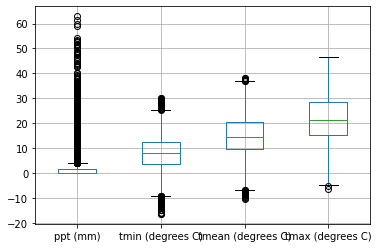

In [4]:
boxplot = df.boxplot(column=['ppt (mm)', 'tmin (degrees C)', 'tmean (degrees C)', 'tmax (degrees C)'])
#sns.boxplot(x=df['ppt (mm)'])


In [5]:
df.describe()

,ppt (mm),tmin (degrees C),tmean (degrees C),tmax (degrees C)
count,47676.000000,47676.000000,47676.000000,47676.000000
mean,1.830498,8.042327,14.868689,21.694617
std,4.237243,6.306959,7.363674,8.729371
min,0.000000,-16.371429,-10.242857,-6.257143
25%,0.000000,3.714286,9.542857,15.085714
50%,0.000000,7.885714,14.557143,21.357143
75%,1.554643,12.428571,20.471429,28.571429
max,62.924286,30.242857,38.171429,46.485714


<AxesSubplot:ylabel='Frequency'>

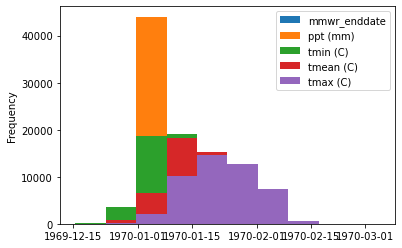

In [6]:
df.plot.hist()

Text(0.5, 1.0, ' California Mean Temp has Normal Distribution')

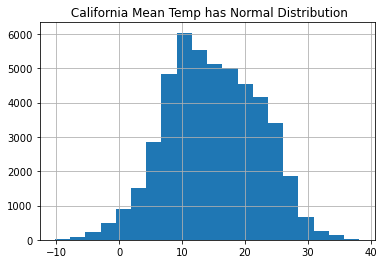

In [6]:
df['tmean (degrees C)'].hist(bins=20)
plt.title(' California Mean Temp has Normal Distribution')

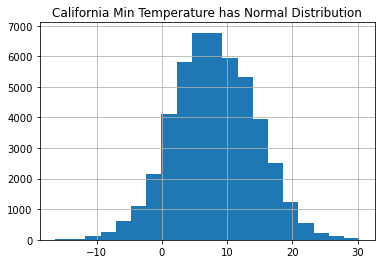

In [7]:
df['tmin (degrees C)'].hist(bins=20);
plt.title('California Min Temperature has Normal Distribution');

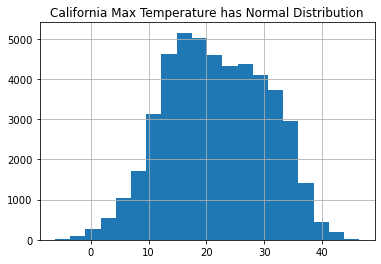

In [8]:
df['tmax (degrees C)'].hist(bins=20)
plt.title('California Max Temperature has Normal Distribution');

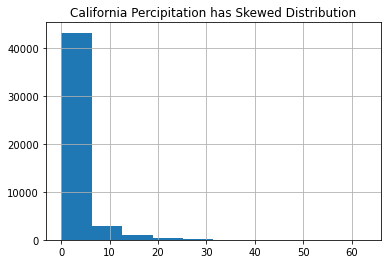

In [10]:
df['ppt (mm)'].hist();
plt.title('California Percipitation has Skewed Distribution');

### 2) NEW DATASET: WNV cases

In [9]:
#wnv= pd.DataFrame(columns = ['year', 'mmwr_week', 'county', 'case_count'])
path2=r'C:\Users\Maria\Dropbox (Personal)\DS4A\Datasets\Current\WNV_CA.csv'

wnv=pd.read_csv(path2, header=None)
wnv.columns=['year', 'mmwr_week','county','case_count']

#fix typos
wnv.loc[((wnv.mmwr_week == 53) & (wnv.year == 2010) ),'mmwr_week']=52
wnv.loc[((wnv.mmwr_week == 53) & (wnv.year == 2012) ),'mmwr_week']=52
wnv.loc[((wnv.mmwr_week == 53) & (wnv.year == 2013) ),'mmwr_week']=52
wnv.loc[((wnv.mmwr_week == 53) & (wnv.year == 2017) ),'mmwr_week']=52
wnv.loc[((wnv.mmwr_week == 53) & (wnv.year == 2018) ),'mmwr_week']=52
wnv.loc[((wnv.mmwr_week == 53) & (wnv.year == 2019) ),'mmwr_week']=52

#function to find enddate, if week 53, there are two special cases
def end_date(y,w):
    if w==53:
        if y==2008:
            return datetime.datetime(2009,1,3)
        elif y==2020:
            return datetime.datetime(2021,1,2)
        else:
            pass
    else:
        week=Week(y,w)
        return week.enddate()

#use year and mmwr_week to correlate to CDC mmwr end_date
wnv['mmwr_enddate']=wnv.apply(lambda x: end_date(x.year, x.mmwr_week), axis=1)

#sum the duplicate rows and clean string case
wnv_clean = wnv.groupby(['mmwr_enddate','year', 'mmwr_week', 'county']).sum()
wnv_clean.reset_index(inplace=True)
wnv_clean['county']=wnv_clean['county'].str.lower()

#replace county names
wnv_clean.county = wnv_clean.county.replace({
    'santa barbara':'santa_barbara',
    'santa clara':'santa_clara',
    'santa cruz':'santa_cruz',
    'san benito':'san_benito',
    'san bernardino':'san_bernardino',
    'san francisco':'san_francisco',
    'san joaquin':'san_joaquin',
    'san luis obispo':'san_luis_obispo',
    'san mateo':'san_mateo',
    'contra costa':'contra_costa',
    'del norte':'del_norte',
    'el dorado':'el_dorado',
    'los angeles':'los_angeles',
    'san diego':'san_diego'
})

#drop mmwr_week
wnv_clean=wnv_clean.drop(columns=['mmwr_week'])
#wnv_clean[wnv_clean['county']=='san_diego']

In [10]:
wnv_clean['county'].value_counts().head()

los_angeles    229
kern           167
stanislaus     159
orange         136
riverside      135
Name: county, dtype: int64

In [11]:
#Duplicates Rows (none)
#wnv_clean[wnv_clean.duplicated()]

#checking for null
wnv_clean.isna().any().any()
df.isnull().sum()

mmwr_enddate         0
ppt (mm)             0
tmin (degrees C)     0
tmean (degrees C)    0
tmax (degrees C)     0
county               0
dtype: int64

<AxesSubplot:>

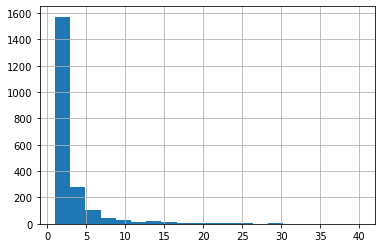

In [14]:
wnv_clean['case_count'].hist(bins=20)

### 3) NEW DATA SET: California Population 

In [67]:
path3=r'C:\Users\Maria\Dropbox (Personal)\DS4A\Datasets\Current\cal_population.csv'

popu=pd.read_csv(path3)
popu['County']=popu['County'].str.lower()
popu=popu.rename(columns={'Year':'year', 'County':'county', 'Population':'population'})

popu.county = popu.county.replace({
    'santa barbara':'santa_barbara',
    'santa clara':'santa_clara',
    'santa cruz':'santa_cruz',
    'san benito':'san_benito',
    'san bernardino':'san_bernardino',
    'san francisco':'san_francisco',
    'san joaquin':'san_joaquin',
    'san luis obispo':'san_luis_obispo',
    'san mateo':'san_mateo',
    'san diego':'san_diego',
    'contra costa':'contra_costa',
    'del norte':'del_norte',
    'el dorado':'el_dorado',
    'los angeles':'los_angeles'   
})

popu.head()


,county,year,population
0,alameda,2006,1462371
1,alameda,2007,1470622
2,alameda,2008,1484085
3,alameda,2009,1497799
4,alameda,2010,1509240


In [13]:
popu.value_counts()

county       year  population
alameda      2006  1462371       1
san_joaquin  2021  781462        1
             2009  677833        1
             2010  684057        1
             2011  691689        1
                                ..
madera       2015  154827        1
             2016  154906        1
             2017  156963        1
             2018  158894        1
yuba         2021  80890         1
Length: 928, dtype: int64

In [17]:
#popu['county'].value_counts()

In [18]:
popu.dtypes

county        object
year           int64
population     int64
dtype: object

In [19]:
popu.isnull().sum()

county        0
year          0
population    0
dtype: int64

### 4) NEW DATA SET: Califonia Regions with Lat/Lon

In [66]:
#Note: This cell/code is from Aaron
path5=r'C:\Users\Maria\Dropbox (Personal)\DS4A\Datasets\Current\county_coordinates.csv'
coordinates=pd.read_csv(path5,header=0)

def f(row):
    if row['latitude_north']<35:
        val=1
    elif row['latitude_north']>=35 and row['latitude_north']<37:
        val=2
    elif row['latitude_north']>=37 and row['latitude_north']<39:
        val=3
    elif row['latitude_north']>=39 and row['latitude_north']<41:
        val=4
    elif row['latitude_north']>=41:
        val=5
    return val
        
coordinates['region']=coordinates.apply(f,axis=1)

coordinates.head()

,county,longitude_west,latitude_north,region
0,imperial,116,33,1
1,orange,118,33,1
2,san_diego,117,33,1
3,los_angeles,118,34,1
4,riverside,117,34,1


### 5) Dataset Merging: df with wnv_clean with regions**

In [65]:
merged=pd.merge(df, wnv_clean, how="left", on=['mmwr_enddate', 'county'])
#merged.sort_values(by='case_count', ascending=False)
merged.drop(columns='year', inplace=True)

#add year column
merged.dtypes
merged['year']=merged['mmwr_enddate'].dt.year

#add month column
merged['month']=merged['mmwr_enddate'].dt.month

#fill in zeros
merged['case_count']=merged['case_count'].fillna(0)

##adding seasonal column
season_dict={1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3, 8: 3, 9: 4, 10: 4, 11: 4, 12: 1}
merged['season']=merged['month'].map(season_dict)

#merged.sort_values(by='case_count', ascending=False).head(20)

#final merge with cooridnates

final_df=pd.merge(merged, coordinates, how="left", on=['county'])

final_df.sort_values(by='case_count', ascending=False).head()

,mmwr_enddate,ppt (mm),tmin (degrees C),tmean (degrees C),tmax (degrees C),county,case_count,year,month,season,longitude_west,latitude_north,region
15410,2017-10-14,0.0,13.514286,18.114286,22.728571,los_angeles,40.0,2017,10,4,118,34,1
15317,2016-01-02,0.0,-0.985714,2.885714,6.814286,los_angeles,34.0,2016,1,1,118,34,1
24291,2014-09-13,0.0,18.457143,25.400000,32.328571,orange,31.0,2014,9,4,118,33,1
15313,2015-12-05,0.0,4.828571,8.271429,11.700000,los_angeles,29.0,2015,12,1,118,34,1
24295,2014-10-11,0.0,15.971429,23.271429,30.585714,orange,29.0,2014,10,4,118,33,1


In [16]:
final_df.isnull().sum()

mmwr_enddate         0
ppt (mm)             0
tmin (degrees C)     0
tmean (degrees C)    0
tmax (degrees C)     0
county               0
case_count           0
year                 0
month                0
season               0
longitude_west       0
latitude_north       0
region               0
dtype: int64

### 6) New Dataset: California Area

In [63]:
path4=r'C:\Users\Maria\Dropbox (Personal)\DS4A\Datasets\Current\cali_area.csv'

area=pd.read_csv(path4)
area['county']=area['county'].str.lower()

#replace county names
area.county = area.county.replace({
    'santa barbara':'santa_barbara',
    'santa clara':'santa_clara',
    'santa cruz':'santa_cruz',
    'san benito':'san_benito',
    'san bernardino':'san_bernardino',
    'san francisco':'san_francisco',
    'san joaquin':'san_joaquin',
    'san luis obispo':'san_luis_obispo',
    'san mateo':'san_mateo',
    'contra costa':'contra_costa',
    'del norte':'del_norte',
    'el dorado':'el_dorado',
    'los angeles':'los_angeles',
    'san diego':'san_diego'
})


#remove sq ft units in column
area['area (sq mi)']=area.area.str[:-6]
   
#get rid of commas in entire datadrame
area=area.replace(',','', regex=True)

area.drop(columns=['area'], inplace=True)

#Merging with final_df
final_df_pop=pd.merge(final_df, popu, how="left", on=['year', 'county'])
df_with_pop_area=pd.merge(final_df_pop, area, how="left", on='county')

df_with_pop_area['area (sq mi)']=df_with_pop_area['area (sq mi)'].astype(float)

#Creating Population Density Column
df_with_pop_area['population_density']=(df_with_pop_area['population']/df_with_pop_area['area (sq mi)']).round(2)
df_with_pop_area.drop(columns=['population','area (sq mi)'], inplace=True)

df_with_pop_area.head()

,mmwr_enddate,ppt (mm),tmin (degrees C),tmean (degrees C),tmax (degrees C),county,case_count,year,month,season,longitude_west,latitude_north,region,population_density
0,2006-01-07,9.561429,5.457143,10.342857,15.228571,alameda,0.0,2006,1,1,122,37,3,1978.8
1,2006-01-14,1.148571,3.728571,9.557143,15.385714,alameda,0.0,2006,1,1,122,37,3,1978.8
2,2006-01-21,3.211429,2.857143,8.000000,13.114286,alameda,0.0,2006,1,1,122,37,3,1978.8
3,2006-01-28,0.437143,3.257143,8.657143,14.100000,alameda,0.0,2006,1,1,122,37,3,1978.8
4,2006-02-04,2.841429,6.414286,11.185714,15.928571,alameda,0.0,2006,2,1,122,37,3,1978.8


In [64]:
#checking types
df_with_pop_area.dtypes

#checking for null values
df_with_pop_area.isnull().sum()

mmwr_enddate          0
ppt (mm)              0
tmin (degrees C)      0
tmean (degrees C)     0
tmax (degrees C)      0
county                0
case_count            0
year                  0
month                 0
season                0
longitude_west        0
latitude_north        0
region                0
population_density    0
dtype: int64

# Data Analysis

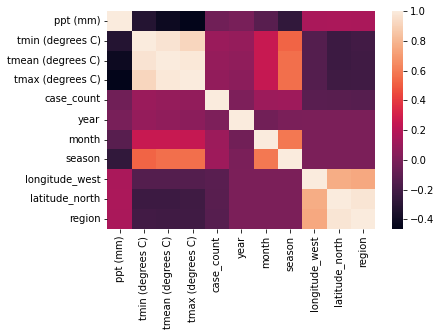

In [17]:
sns.heatmap(final_df.corr());
#final_df.corr()

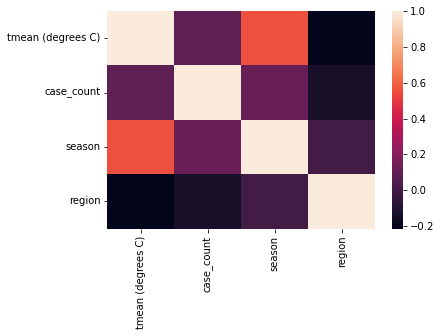

In [18]:
sns.heatmap(final_df[['tmean (degrees C)', 'case_count','season','region']].corr());
#final_df.corr()

**Seasonal, Monthly, Yearly Data Analysis**

<AxesSubplot:xlabel='season'>

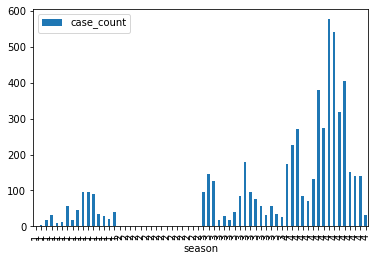

In [19]:
season=final_df[['year','season','case_count']].groupby(['season', 'year']).sum()
season=season.reset_index()
season.plot.bar(x='season', y='case_count', stacked=True)
#year3.plot(kind='bar', stacked=True, colormap='Paired')

In [26]:
#seaborn (Too Small)
#g2=sns.FacetGrid(final_df, col="year") #equal it to variable
#g2.map_dataframe(sns.scatterplot,x="season", y="case_count")
#map_dataframe allows for setting x and y (.map does not)

<AxesSubplot:xlabel='month'>

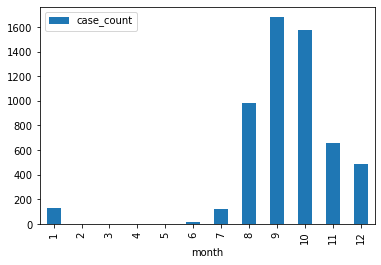

In [20]:
month=final_df[['month','case_count']].groupby(['month']).sum()
month
month.plot.bar()

<AxesSubplot:xlabel='year'>

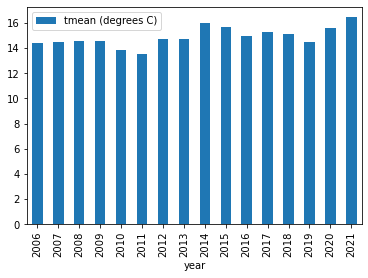

In [21]:
year_temp=final_df[['year','tmean (degrees C)']].groupby(['year']).mean()
year_temp.plot.bar()

<AxesSubplot:xlabel='year'>

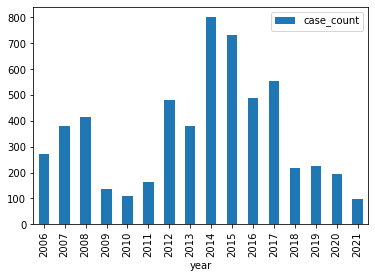

In [22]:
case_by_year=final_df[['year', 'case_count']].groupby(['year']).sum()
case_by_year.plot.bar()

<AxesSubplot:xlabel='year,month'>

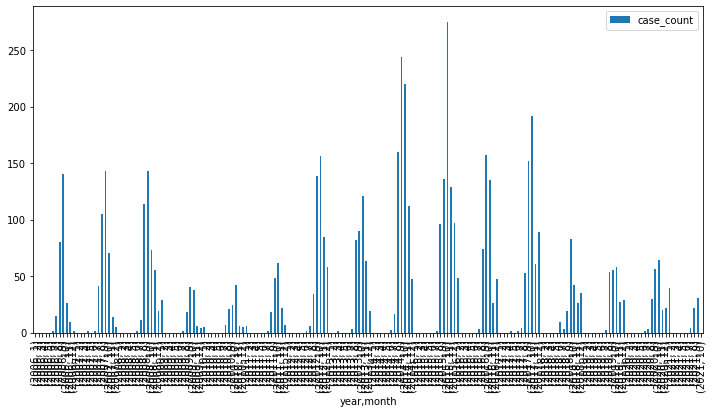

In [23]:
year_month=final_df[['year', 'month', 'case_count']].groupby(['year', 'month']).sum()
year_month
year_month.plot.bar(figsize=(12,6))
#colorcode by season

**Scatter Plot Analysis**

In [50]:
#Using seaborn
#g=sns.FacetGrid(final_df, row="year") #equal it to variable

#TIP: map_dataframe allows for setting x and y (.map does not)
#g.map_dataframe(sns.scatterplot,x="month", y="case_count")


<AxesSubplot:xlabel='month', ylabel='case_count'>

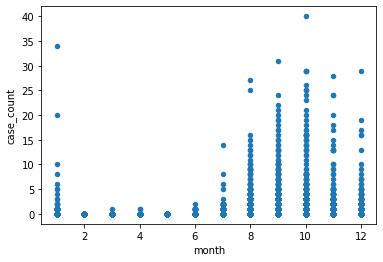

In [25]:
plot1=final_df.plot.scatter(x='month', y='case_count')
plot1

<AxesSubplot:xlabel='year', ylabel='case_count'>

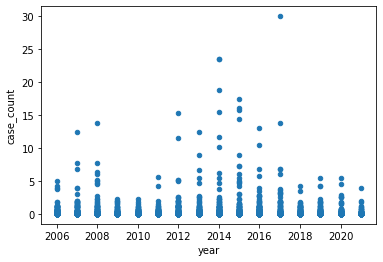

In [26]:
test1=final_df.groupby(by=['year','month','county']).mean()
test1=test1.reset_index()
test1.plot.scatter(x='year', y='case_count')

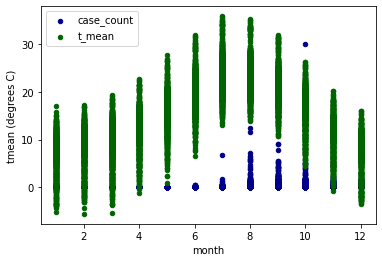

In [27]:
ax=test1.plot(kind='scatter', x='month', y='case_count', color='DarkBlue', label='case_count');

test1.plot(kind='scatter', x='month', y='tmean (degrees C)', color='DarkGreen', label='t_mean', ax=ax);

**Note: Found its too many points, best to look at split data**

### Part A: Month vs Temp vs Case Count by Region

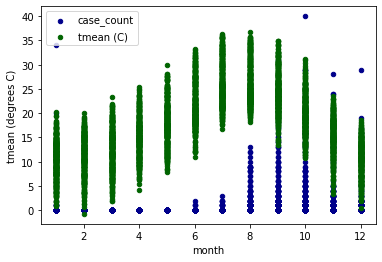

In [28]:
region1=final_df[ final_df['region']==1]
region1
ax=region1.plot(kind='scatter', x='month', y='case_count', color='DarkBlue', label='case_count');

region1.plot(kind='scatter', x='month', y='tmean (degrees C)', color='DarkGreen', label='tmean (C)', ax=ax);

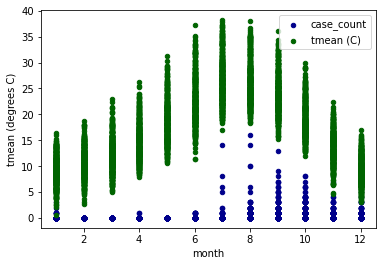

In [29]:
region2=final_df[ final_df['region']==2]
region2
ax=region2.plot(kind='scatter', x='month', y='case_count', color='DarkBlue', label='case_count');

region2.plot(kind='scatter', x='month', y='tmean (degrees C)', color='DarkGreen', label='tmean (C)', ax=ax);

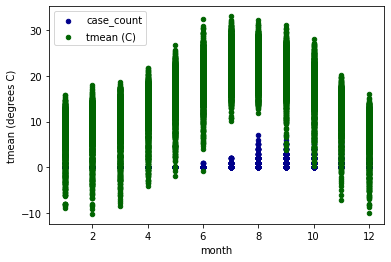

In [30]:
region3=final_df[ final_df['region']==3]
region3
ax=region3.plot(kind='scatter', x='month', y='case_count', color='DarkBlue', label='case_count');
region3.plot(kind='scatter', x='month', y='tmean (degrees C)', color='DarkGreen', label='tmean (C)', ax=ax);

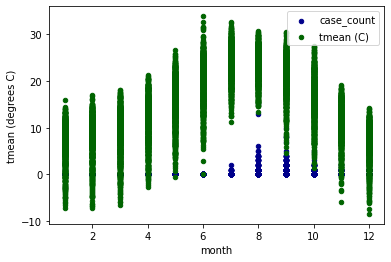

In [31]:
region4=final_df[ final_df['region']==4]
region4
ax=region4.plot(kind='scatter', x='month', y='case_count', color='DarkBlue', label='case_count');
region4.plot(kind='scatter', x='month', y='tmean (degrees C)', color='DarkGreen', label='tmean (C)', ax=ax);

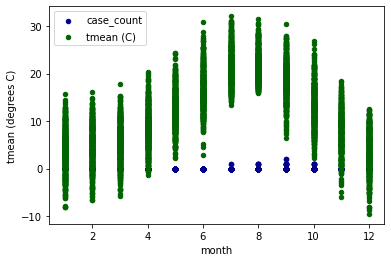

In [32]:
region5=final_df[ final_df['region']==5]
region5
ax=region5.plot(kind='scatter', x='month', y='case_count', color='DarkBlue', label='case_count');
region5.plot(kind='scatter', x='month', y='tmean (degrees C)', color='DarkGreen', label='tmean (C)', ax=ax);

### Part B: Month vs Temp vs Case Count in Los Angeles (2014)

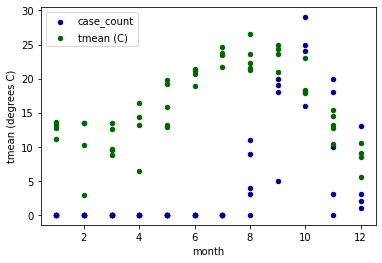

In [35]:
#LA_2014 used to be called test2
LA_2014=merged[ (merged['year']==2014) & (merged['county']=='los_angeles')]

# T-mean
ax=LA_2014.plot(kind='scatter', x='month', y='case_count', color='DarkBlue', label='case_count');
LA_2014.plot(kind='scatter', x='month', y='tmean (degrees C)', color='DarkGreen', label='tmean (C)', ax=ax);

<AxesSubplot:xlabel='month', ylabel='tmin (degrees C)'>

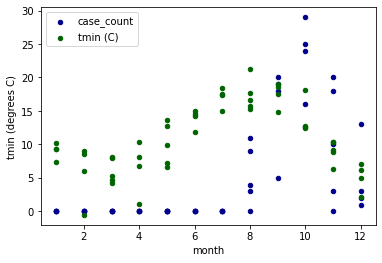

In [36]:
# T-min 
ax=LA_2014.plot(kind='scatter', x='month', y='case_count', color='DarkBlue', label='case_count');
LA_2014.plot(kind='scatter', x='month', y='tmin (degrees C)', color='DarkGreen', label='tmin (C)', ax=ax)

<AxesSubplot:xlabel='month', ylabel='tmax (degrees C)'>

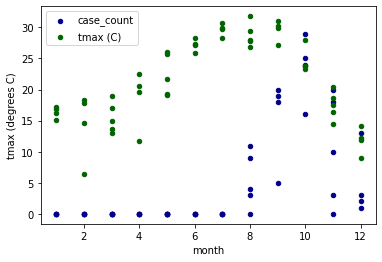

In [37]:
# T-max
ax=LA_2014.plot(kind='scatter', x='month', y='case_count', color='DarkBlue', label='case_count');
LA_2014.plot(kind='scatter', x='month', y='tmax (degrees C)', color='DarkGreen', label='tmax (C)', ax=ax)

<AxesSubplot:xlabel='month', ylabel='ppt (mm)'>

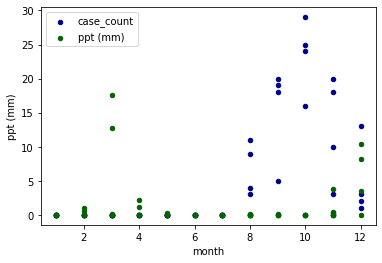

In [44]:
# PPT
#becareful with ppt because not very linear
ax=LA_2014.plot(kind='scatter', x='month', y='case_count', color='DarkBlue', label='case_count');
LA_2014.plot(kind='scatter', x='month', y='ppt (mm)', color='DarkGreen', label='ppt (mm)', ax=ax)

C:\Users\Maria\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Maria\AppData\Local\Temp/ipykernel_320/55901949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LA_2014['log_ppt (mm)']=np.log(LA_2014['ppt (mm)'])


<AxesSubplot:xlabel='month', ylabel='log_ppt (mm)'>

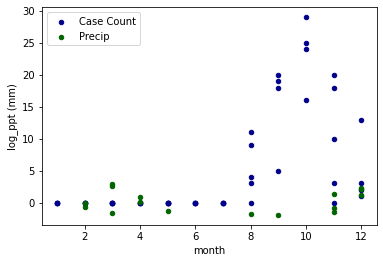

In [38]:
LA_2014['log_ppt (mm)']=np.log(LA_2014['ppt (mm)'])
#LA_2014.head()
ax=LA_2014.plot(kind='scatter',x='month',y='case_count', color='DarkBlue',label='Case Count');
LA_2014.plot(kind='scatter',x='month',y='log_ppt (mm)', color='DarkGreen',label='Precip',ax=ax)

North and South California Temperature different. See Whats happening in a different region: Sacramento

### Part C: Month vs Temp vs Case Count in Sacramento (2007 and 2016)

In [46]:
SAC_2014=merged[['year','case_count']][(merged['county']=='sacramento')]
#To find year with most cases (2016 and 2007)
#SAC_2014.groupby('year').sum()

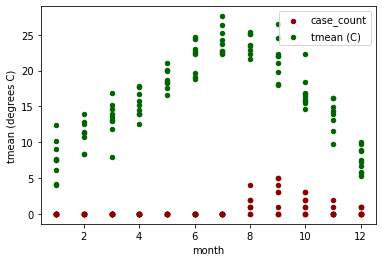

In [39]:
#Filtering 
SAC_2016=merged[ ((merged['year']==2016) | (merged['year']==2007) )& (merged['county']=='sacramento')]
#SAC_2016
ax=SAC_2016.plot(kind='scatter', x='month', y='case_count', color='DarkRed', label='case_count');
SAC_2016.plot(kind='scatter', x='month', y='tmean (degrees C)', color='DarkGreen', label='tmean (C)', ax=ax);

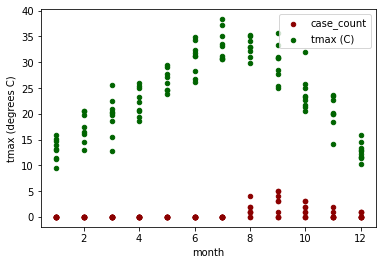

In [40]:
ax=SAC_2016.plot(kind='scatter', x='month', y='case_count', color='DarkRed', label='case_count');

SAC_2016.plot(kind='scatter', x='month', y='tmax (degrees C)', color='DarkGreen', label='tmax (C)', ax=ax);

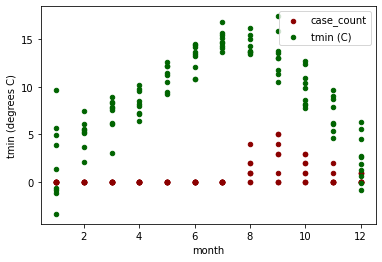

In [41]:
ax=SAC_2016.plot(kind='scatter', x='month', y='case_count', color='DarkRed', label='case_count');

SAC_2016.plot(kind='scatter', x='month', y='tmin (degrees C)', color='DarkGreen', label='tmin (C)', ax=ax);

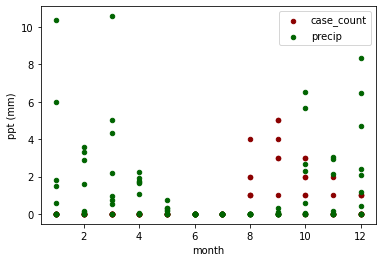

In [42]:
ax=SAC_2016.plot(kind='scatter', x='month', y='case_count', color='DarkRed', label='case_count');

SAC_2016.plot(kind='scatter', x='month', y='ppt (mm)', color='DarkGreen', label='precip', ax=ax);

In [51]:
SAC_2016['log_ppt (mm)']=np.log(SAC_2016['ppt (mm)'])
SAC_2016.head()

C:\Users\Maria\AppData\Local\Temp/ipykernel_3156/268450991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SAC_2016['log_ppt (mm)']=np.log(SAC_2016['ppt (mm)'])


,mmwr_enddate,ppt (mm),tmin (C),tmean (C),tmax (C),county,case_count,year,month,season,log_ppt (mm)
27178,2007-01-06,0.610000,1.400000,7.642857,13.914286,sacramento,0.0,2007,1,1,-0.494296
27179,2007-01-13,0.000000,-0.585714,6.185714,13.014286,sacramento,0.0,2007,1,1,-inf
27180,2007-01-20,0.000000,-3.328571,4.000000,11.342857,sacramento,0.0,2007,1,1,-inf
27181,2007-01-27,0.000000,-0.871429,7.528571,15.914286,sacramento,0.0,2007,1,1,-inf
27182,2007-02-03,0.151429,2.071429,8.300000,14.542857,sacramento,0.0,2007,2,1,-1.887641


<AxesSubplot:xlabel='month', ylabel='log_ppt (mm)'>

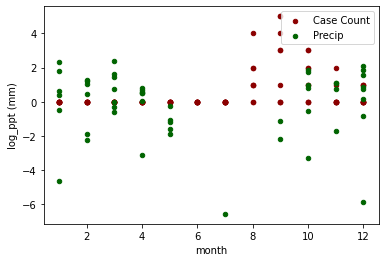

In [52]:
ax=SAC_2016.plot(kind='scatter',x='month',y='case_count', color='DarkRed',label='Case Count');
SAC_2016.plot(kind='scatter',x='month',y='log_ppt (mm)', color='DarkGreen',label='Precip',ax=ax)
#want to change y label to generic #

### Part D: Analysis of 75th Percentile (from Ginger)

In [ ]:
#Note this section D is from Ginger

<AxesSubplot:xlabel='month', ylabel='ppt (mm)'>

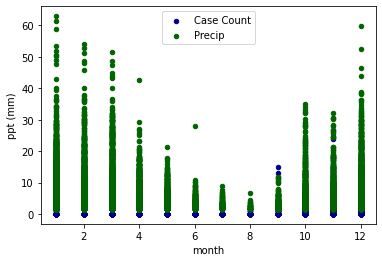

In [51]:
#creating dataframe and scatterplot of precipitation greater than the 75th percentile to see
#if higher precipitation amounts correlate with increased case counts
ppt75=merged[merged['ppt (mm)']>merged['ppt (mm)'].quantile(0.75)]
ax=ppt75.plot(kind='scatter',x='month',y='case_count', color='DarkBlue',label='Case Count');
ppt75.plot(kind='scatter',x='month',y='ppt (mm)', color='DarkGreen',label='Precip',ax=ax)

array([[<AxesSubplot:title={'center':'ppt (mm)'}>]], dtype=object)

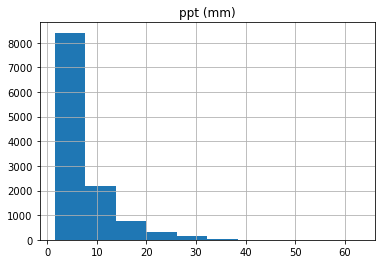

In [52]:
#checking distribution of 75th+ percentile precip. data for distribution
ppt75.hist(column='ppt (mm)')

C:\Users\Maria\AppData\Local\Temp/ipykernel_320/1818174024.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ppt75['log_ppt (mm)']=np.log(ppt75['ppt (mm)'])


array([[<AxesSubplot:title={'center':'log_ppt (mm)'}>]], dtype=object)

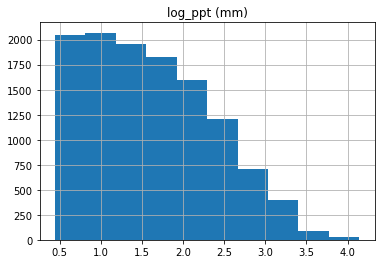

In [53]:
#checking log transform of 75th+ percentile precipitation data for distribution
import numpy as np
ppt75['log_ppt (mm)']=np.log(ppt75['ppt (mm)'])
ppt75.hist(column='log_ppt (mm)')

**PPT in Los Angeles 2014 (75th Percentile)**

<AxesSubplot:xlabel='month', ylabel='ppt (mm)'>

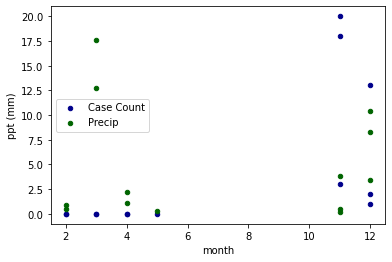

In [55]:
#test 2 not found, 

ppttest2=LA_2014[LA_2014['ppt (mm)']>LA_2014['ppt (mm)'].quantile(0.75)]
ax=ppttest2.plot(kind='scatter',x='month',y='case_count', color='DarkBlue',label='Case Count');
ppttest2.plot(kind='scatter',x='month',y='ppt (mm)', color='DarkGreen',label='Precip',ax=ax)

array([[<AxesSubplot:title={'center':'ppt (mm)'}>]], dtype=object)

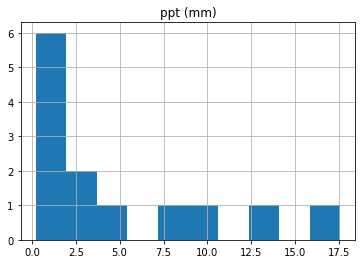

In [56]:
#distribution of Los Angeles 2014 75th+ precip data
ppttest2.hist(column='ppt (mm)')

**PPT in Sacramento 2016 and 2007 (75th Percentile)**

<AxesSubplot:xlabel='month', ylabel='ppt (mm)'>

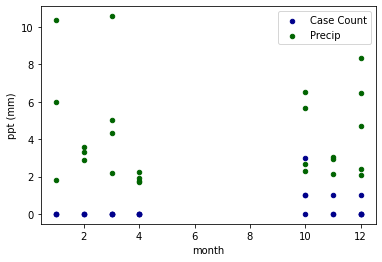

In [58]:
#75th+ percentile of Sacramento precip compared to case count
pptSAC2016=SAC_2016[SAC_2016['ppt (mm)']>SAC_2016['ppt (mm)'].quantile(0.75)]
ax=pptSAC2016.plot(kind='scatter',x='month',y='case_count', color='DarkBlue',label='Case Count');
pptSAC2016.plot(kind='scatter',x='month',y='ppt (mm)', color='DarkGreen',label='Precip',ax=ax)

array([[<AxesSubplot:title={'center':'ppt (mm)'}>]], dtype=object)

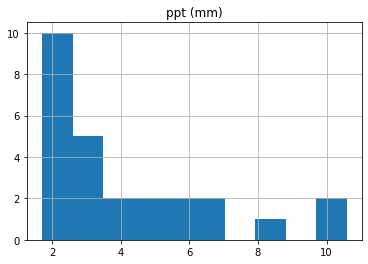

In [59]:
#checking distribution of 75th+ percentile of Sacramento precip to see distribution
pptSAC2016.hist(column='ppt (mm)')

C:\Users\Maria\AppData\Local\Temp/ipykernel_320/3753835129.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pptSAC2016['log_ppt (mm)']=np.log(pptSAC2016['ppt (mm)'])


array([[<AxesSubplot:title={'center':'log_ppt (mm)'}>]], dtype=object)

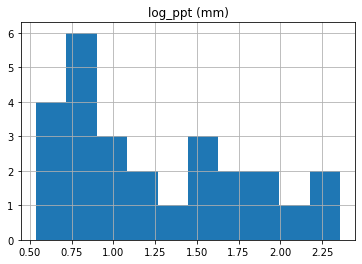

In [60]:
#checking log transform of 75th+ percentile of Sacramento precip to see distribution
import numpy as np
pptSAC2016['log_ppt (mm)']=np.log(pptSAC2016['ppt (mm)'])
pptSAC2016.hist(column='log_ppt (mm)')

<AxesSubplot:xlabel='month', ylabel='log_ppt (mm)'>

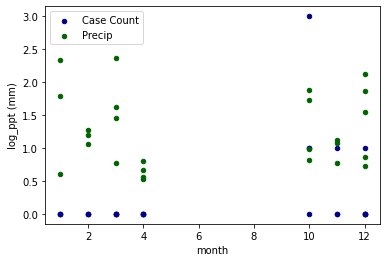

In [61]:
#pptSAC2016=SAC_2016[SAC_2016['ppt (mm)']>SAC_2016['ppt (mm)'].quantile(0.75)]
ax=pptSAC2016.plot(kind='scatter',x='month',y='case_count', color='DarkBlue',label='Case Count');
pptSAC2016.plot(kind='scatter',x='month',y='log_ppt (mm)', color='DarkGreen',label='Precip',ax=ax)

### 6) New Dataset & Merging (with Population Data)**

In [44]:
#wnv= pd.DataFrame(columns = ['year', 'mmwr_week', 'county', 'case_count'])
path4=r'C:\Users\Maria\Dropbox (Personal)\DS4A\Datasets\Current\cali_area.csv'

area=pd.read_csv(path4)
area['county']=area['county'].str.lower()

#replace county names
area.county = area.county.replace({
    'santa barbara':'santa_barbara',
    'santa clara':'santa_clara',
    'santa cruz':'santa_cruz',
    'san benito':'san_benito',
    'san bernardino':'san_bernardino',
    'san francisco':'san_francisco',
    'san joaquin':'san_joaquin',
    'san luis obispo':'san_luis_obispo',
    'san mateo':'san_mateo',
    'contra costa':'contra_costa',
    'del norte':'del_norte',
    'el dorado':'el_dorado',
    'los angeles':'los_angeles',
    'san diego':'san_diego'
})


#remove sq ft units in column
area['area (sq mi)']=area.area.str[:-6]
   
#get rid of commas in entire datadrame
area=area.replace(',','', regex=True)

area.drop(columns=['area'], inplace=True)

#Merging with final_df
final_df_pop=pd.merge(final_df, popu, how="left", on=['year', 'county'])
df_with_pop_area=pd.merge(final_df_pop, area, how="left", on='county')

df_with_pop_area['area (sq mi)']=df_with_pop_area['area (sq mi)'].astype(float)

#Creating Population Density Column
df_with_pop_area['population_density']=(df_with_pop_area['population']/df_with_pop_area['area (sq mi)']).round(2)
df_with_pop_area.drop(columns=['population','area (sq mi)'], inplace=True)

df_with_pop_area

**Merging: Merged_pop with Population Density**

<AxesSubplot:xlabel='population_density', ylabel='case_count'>

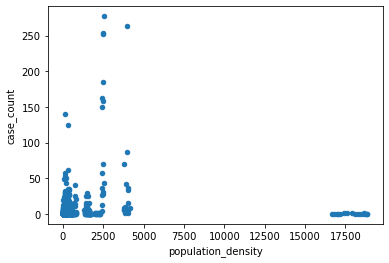

In [48]:
test6=df_with_pop_area.groupby(['county','year']).agg({'case_count': 'sum', 'population_density': 'mean'})
test6=test6.sort_values(by='population_density', ascending=False).reset_index()
test6.head(50)
test6.plot(kind='scatter', x='population_density', y='case_count')

<AxesSubplot:xlabel='year', ylabel='population_density'>

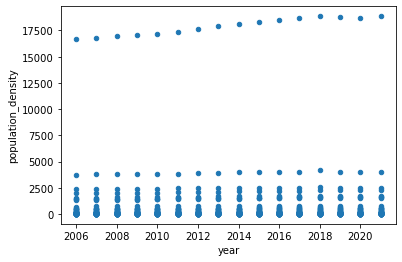

In [49]:
test6.plot(kind='scatter',x='year', y='population_density')

In [65]:
final_df.to_csv('cali_temp_wnv_cases.csv')

In [64]:
#Next steps
#residuals are staying the same over time 

#then check for assumptions of linear regression - make sure climate variables and wnv cases 
#have a linear relationship on a scatter plot, have a normal distribution on a histogram, 

#and aren't too closely correlated with each other with a Pearson's Bivariate Correlation matrix, 
#then check for homoscedasticity with a scatter plot residuals
#resources: https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/
#https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0